In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# import data
csv_path = "sample_data/heart.csv"



In [ ]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
#melihat ukuran data
df.shape

(918, 12)

In [ ]:
#mengecek tipe data dari setiap kolom
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [ ]:
#melihat informasi lebih lanjut
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#melihat deksripsi data
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
#mengindentifikasi missing value
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
#menghitung jumlah calue yang muncul pada kolom HeartDisease
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


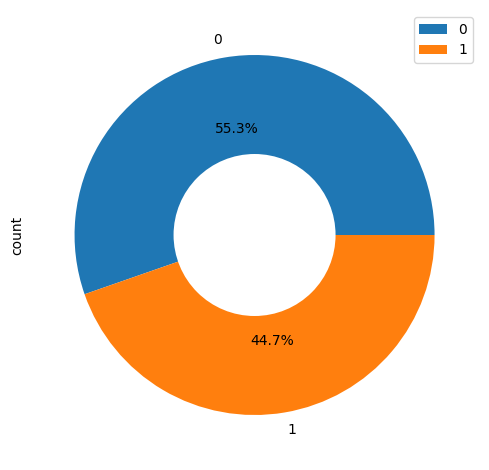

In [ ]:
#menampilan presentase Heart Disease dengan pie plot
df.HeartDisease.value_counts().plot.pie(autopct='%1.1f%%', labels=df['HeartDisease'].unique(), legend=True)
center_circle = plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(center_circle)
plt.tight_layout()
plt.show()

In [ ]:
df.Sex.value_counts()

,count
Sex,
M,725
F,193


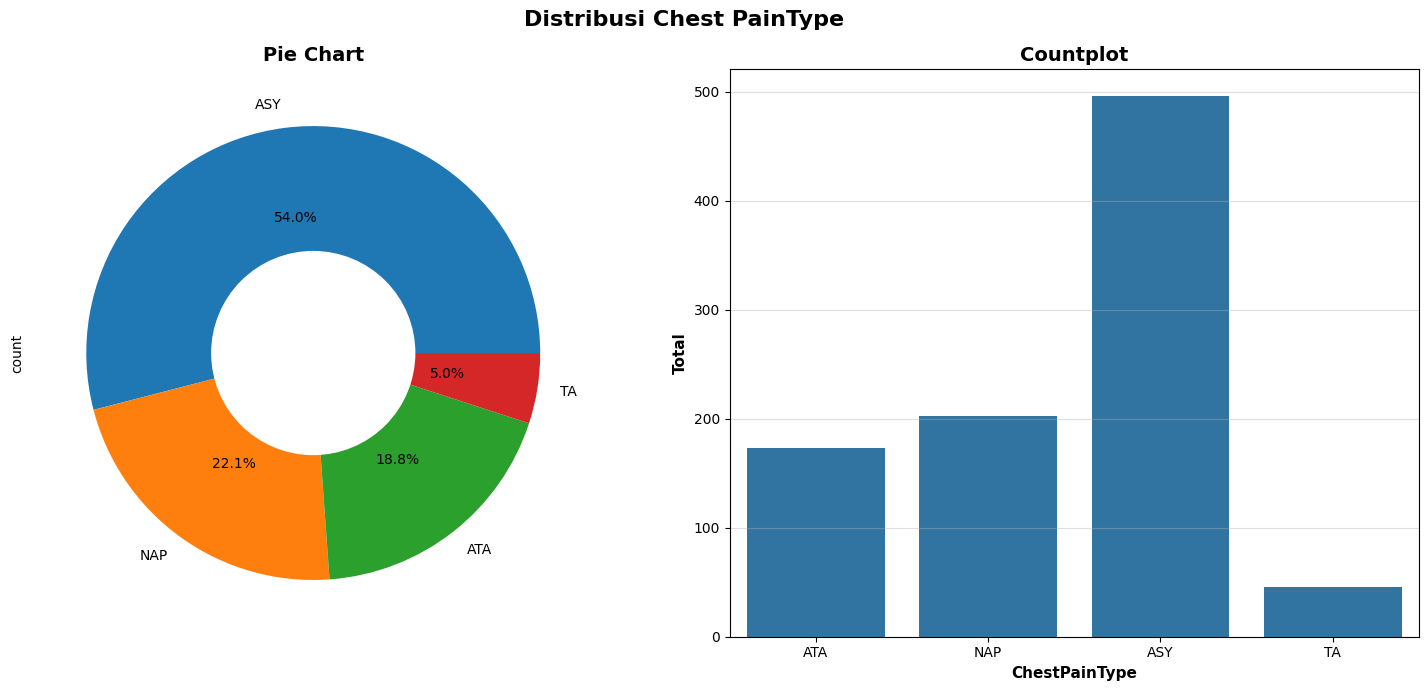

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat ukuran gambar
plt.figure(figsize=(15, 7))

# Menambahkan judul utama
plt.suptitle("Distribusi Chest PainType", fontweight='heavy', fontsize=16)

# Membuat pie plot
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
df.ChestPainType.value_counts().plot.pie(autopct='%1.1f%%', labels=['ASY', 'NAP', 'ATA', 'TA'])

# Menambahkan lingkaran tengah untuk membuat efek donat
Center_circle = plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(Center_circle)

# Membuat countplot
plt.subplot(1, 2, 2)
plt.title('Countplot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.countplot(x="ChestPainType", data=df)

# Menambahkan label pada countplot
plt.xlabel('ChestPainType', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')

# Menambahkan grid pada sumbu y
plt.grid(axis='y', alpha=0.4)

# Menampilkan plot
plt.tight_layout()
plt.show()


In [ ]:
df.RestingECG.value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


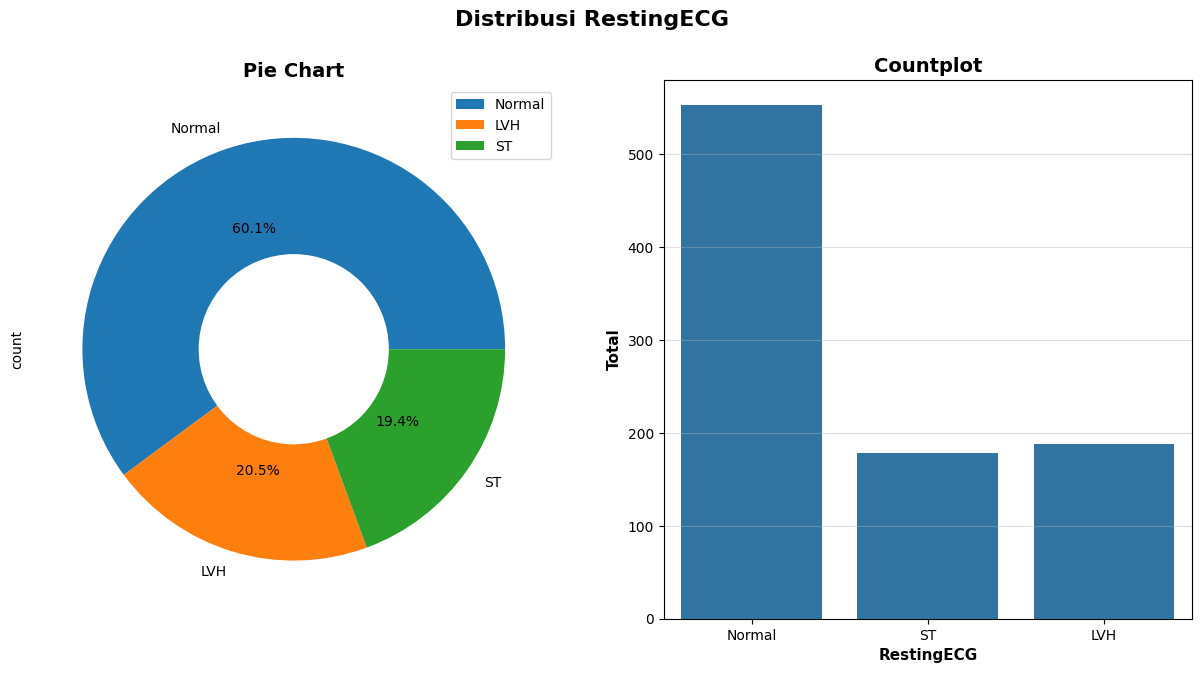

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

# Title for the whole figure
plt.suptitle("Distribusi RestingECG", fontweight='heavy', fontsize=16)

# Membuat pie plot
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
df.RestingECG.value_counts().plot.pie(
    autopct='%1.1f%%', labels=['Normal', 'LVH', 'ST'], legend=True
)
center_circle = plt.Circle((0, 0), 0.45, fc='white')
plt.gca().add_artist(center_circle)

# Membuat countplot
plt.subplot(1, 2, 2)
plt.title('Countplot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.countplot(x='RestingECG', data=df)
plt.xlabel('RestingECG', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)

plt.show()

In [ ]:
df.ExerciseAngina.value_counts()

,count
ExerciseAngina,
N,547
Y,371


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung Min, Max, dan Mean dari variabel Age
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())
print("Mean Age:", df.Age.mean())

# Output:
# Max Age: 77
# Min Age: 28
# Mean Age: 53.510893246187365


Max Age: 77
Min Age: 28
Mean Age: 53.510893246187365


<ipython-input-39-6c8c5c9d7317>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.FastingBS)


<Axes: xlabel='FastingBS', ylabel='Density'>

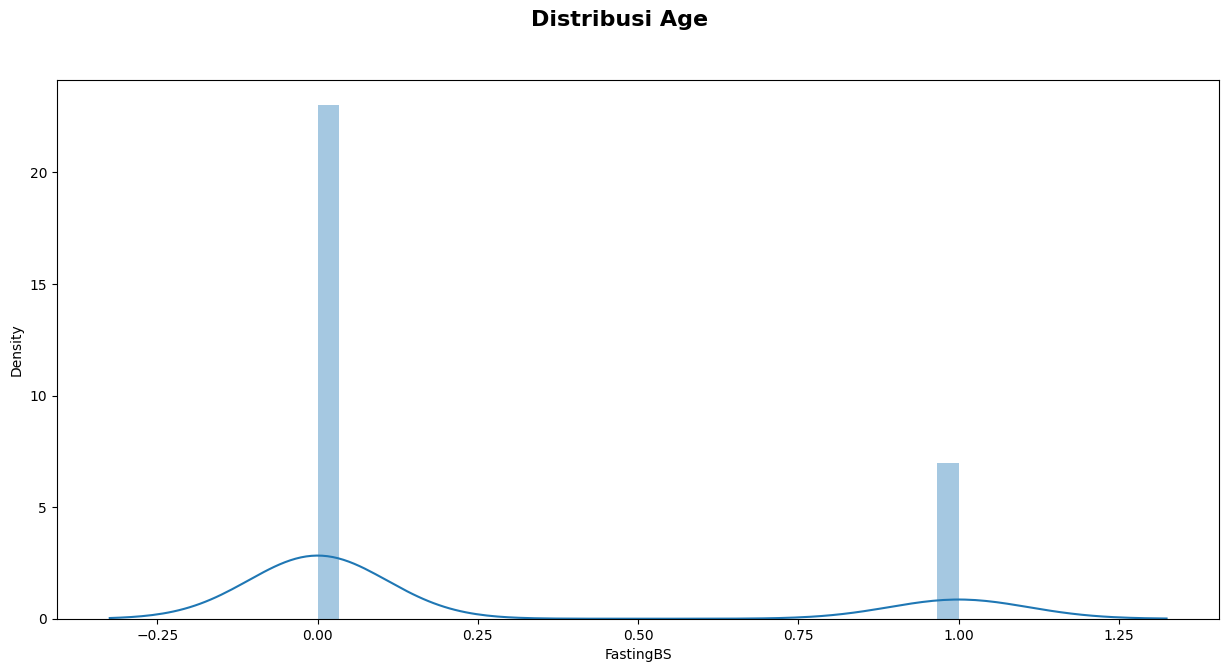

In [ ]:
#membuat ukuran gambar

plt.figure(figsize=(15,7))

plt.suptitle("Distribusi Age", fontweight = 'heavy', fontsize=16)

#membuat visualisasi distribusi menggunakan distplot sns.distplot(.Age)
sns.distplot(df.FastingBS)

In [ ]:
print("Max FastingBS:", df.FastingBS.max())
print("Min FastingBS:", df.FastingBS.min())
print("Mean FastingBS:", df.FastingBS.mean())


Max FastingBS: 1
Min FastingBS: 0
Mean FastingBS: 0.23311546840958605


<ipython-input-41-ab84c8f05a32>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MaxHR)


<Axes: xlabel='MaxHR', ylabel='Density'>

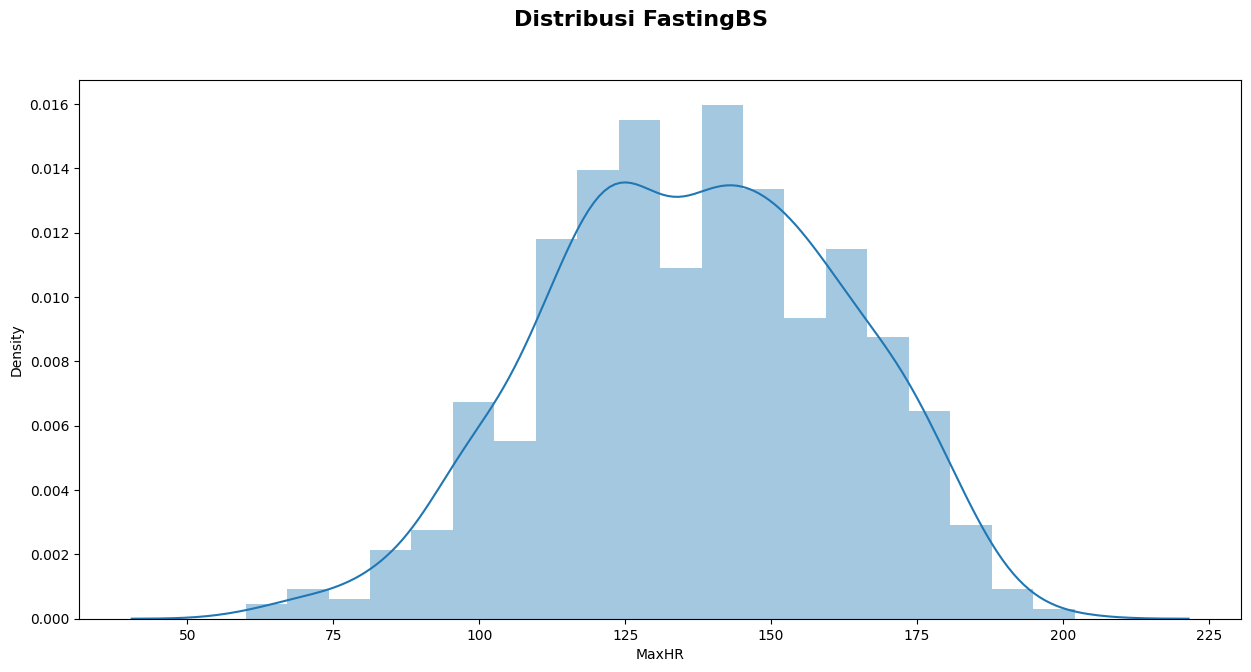

In [ ]:
plt.figure(figsize=(15,7))
plt.suptitle("Distribusi FastingBS", fontweight = 'heavy', fontsize=16)
sns.distplot(df.MaxHR)

In [ ]:
print("Max Oldpeak"),df.Oldpeak.max()
print("Min Oldpeak"),df.Oldpeak.min()
print("Mean Oldpeak"),df.Oldpeak.mean()

Max Oldpeak
Min Oldpeak
Mean Oldpeak


(None, 0.8873638344226579)

<ipython-input-44-134c42671d08>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Oldpeak)


<Axes: xlabel='Oldpeak', ylabel='Density'>

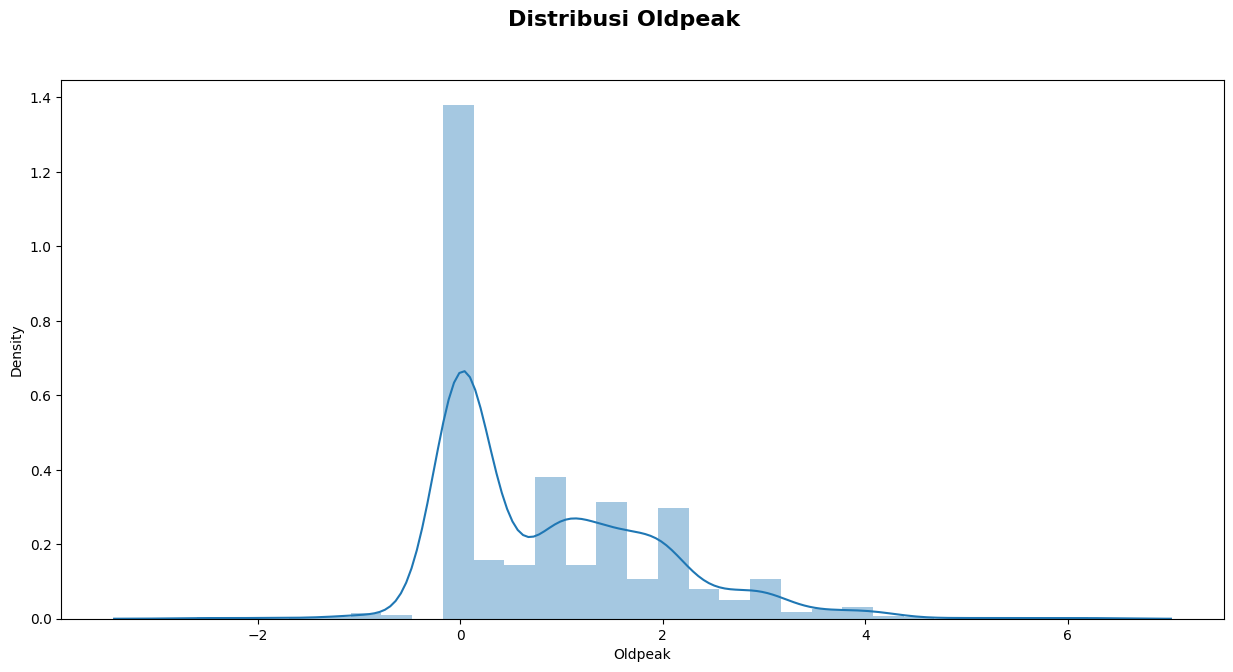

In [ ]:
plt.figure(figsize=(15,7))
plt.suptitle("Distribusi Oldpeak", fontweight = 'heavy', fontsize=16)
sns.distplot(df.Oldpeak)

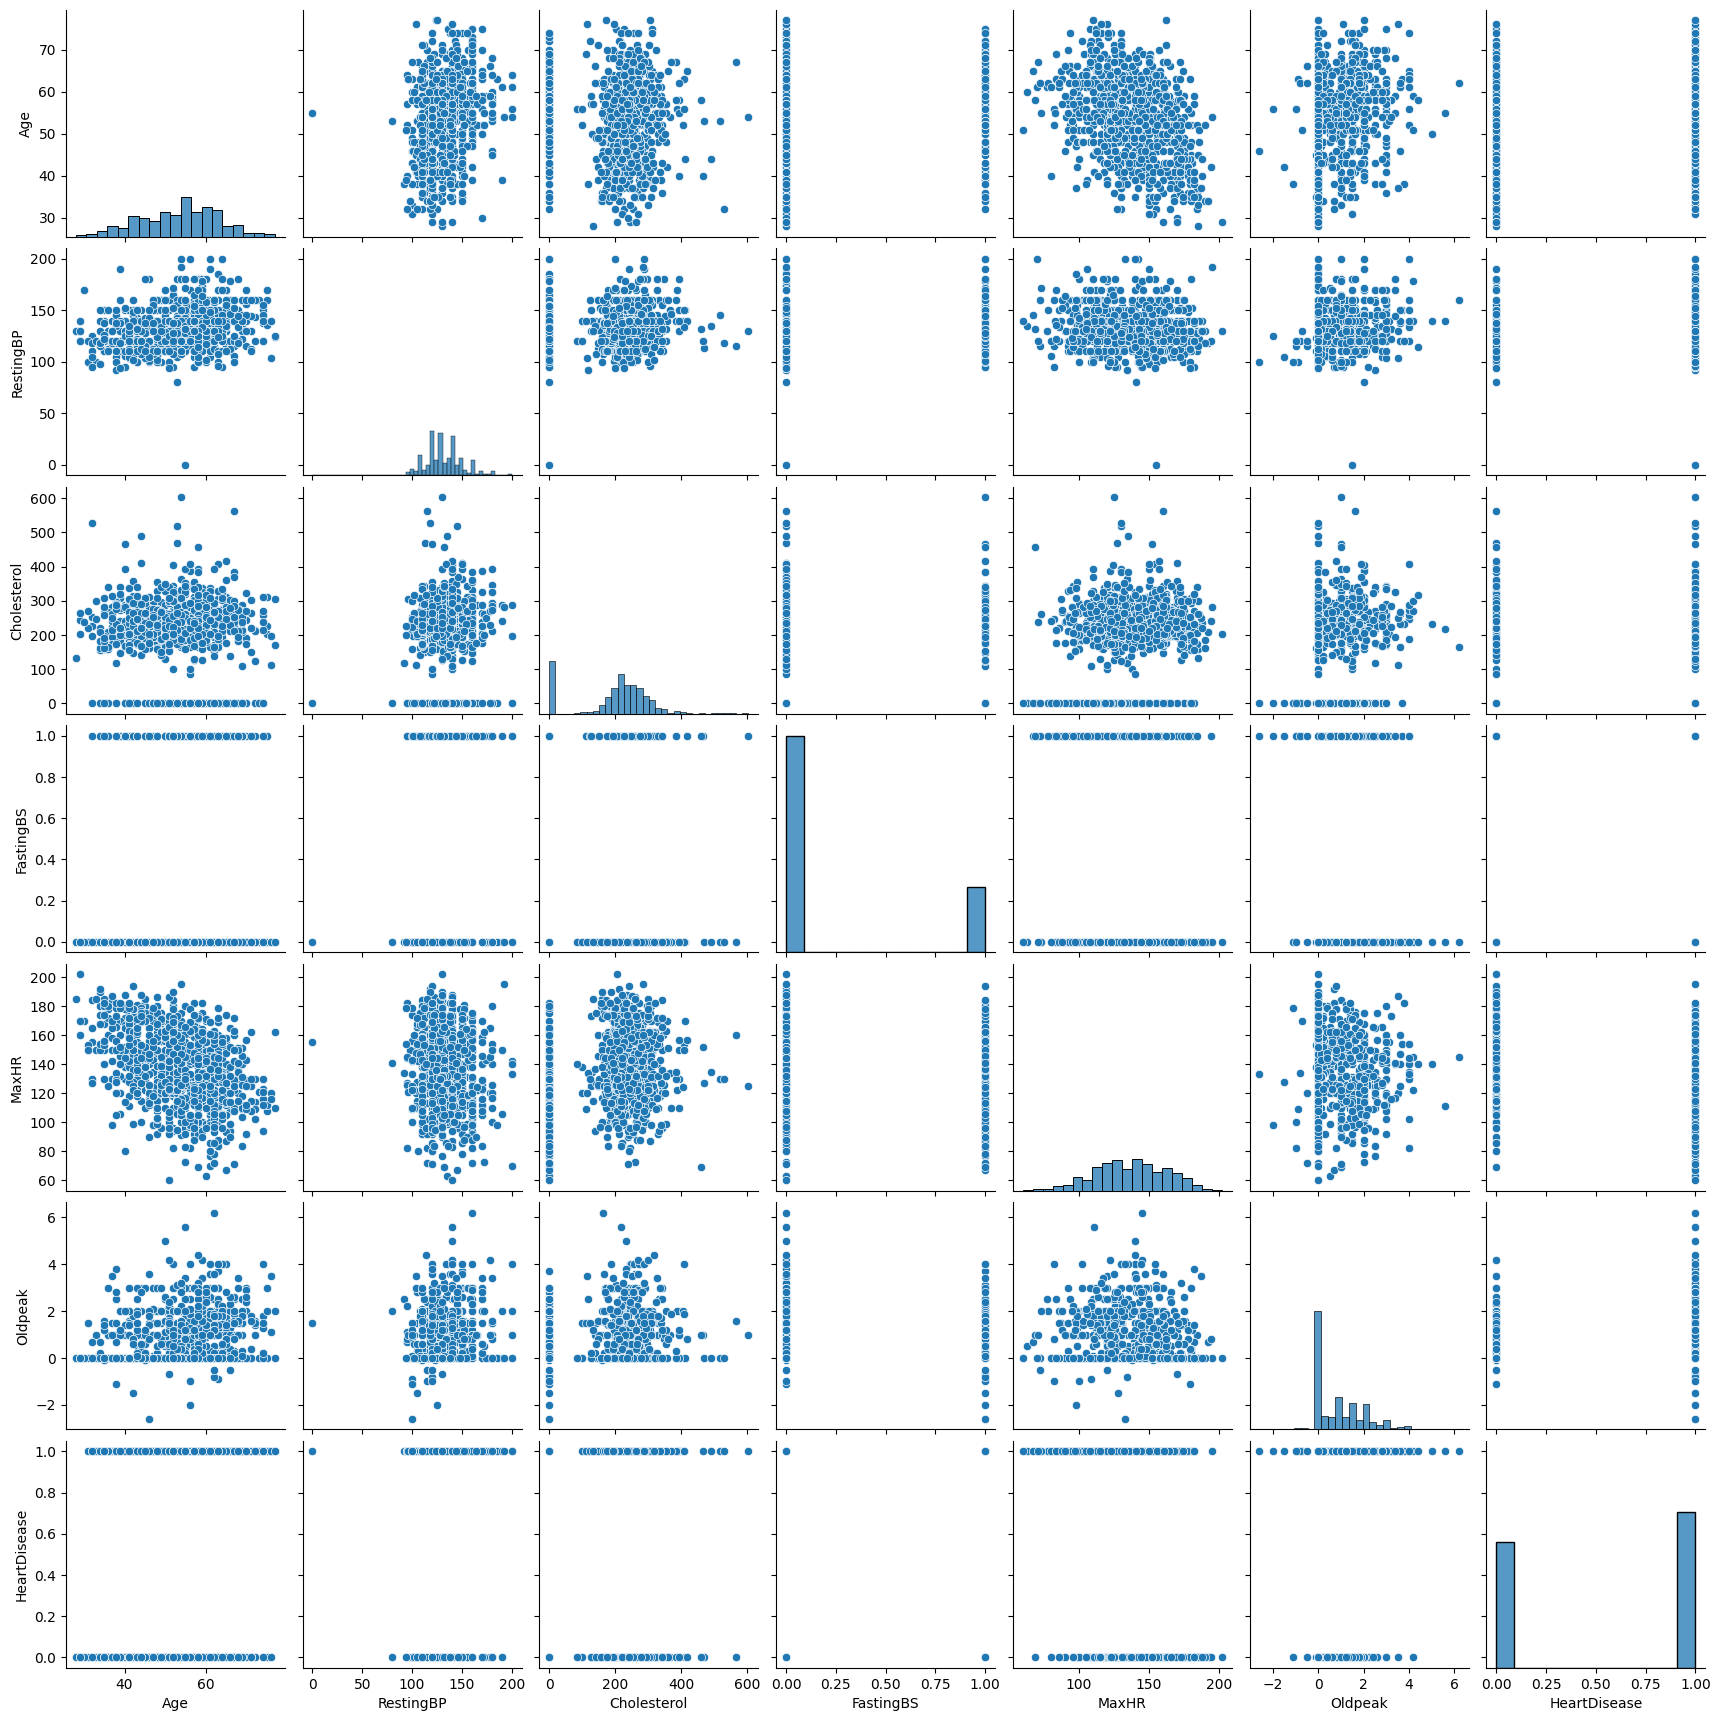

In [ ]:
sns.pairplot(df)

In [ ]:
df['ChestPainType'] = pd.to_numeric(df['ChestPainType'].replace('M', 0), errors='coerce')

# Alternatively, if the column is not needed for correlation, you can drop it:
# df = df.drop(columns=['ChestPainType'])

# Now, calculate the correlation matrix and create the heatmap:
plt.figure(figsize=(7,6))
sns.heatmap(data=df.corr(),vmin=-1,vmax=1, annot=True,cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'M'

<Figure size 700x600 with 0 Axes>

In [ ]:
import numpy as np
table_age =pd.pivot_table(df, values='MaxHR', index='HeartDisease', aggfunc=np.mean)
table_age

<ipython-input-50-f59590d560e2>:2: FutureWarning: The provided callable <function mean at 0x7b9b88a29000> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table_age =pd.pivot_table(df, values='MaxHR', index='HeartDisease', aggfunc=np.mean)


,MaxHR
HeartDisease,
0,148.151220
1,127.655512


In [ ]:
df.groupby(['HeartDisease','Sex']).size().reset_index(name='counts')

,HeartDisease,Sex,counts
0,0,F,143
1,0,M,267
2,1,F,50
3,1,M,458


In [ ]:
cols=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)

In [ ]:
x=df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']
x=MinMaxScaler().fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
rfc=RandomForestClassifier(n_estimators=42)
rfc.fit(x_train,y_train)
rf_pred=rfc.predict(x_test)

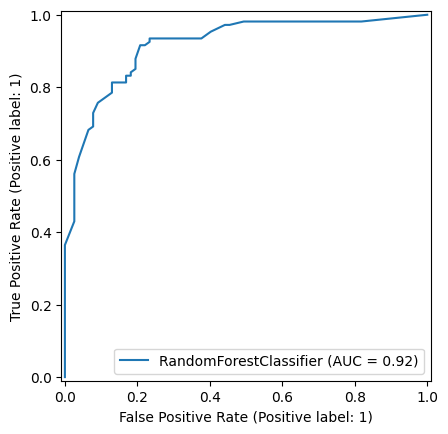

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rfc, x_test, y_test)
plt.show()

In [ ]:
print("akurasi:",accuracy_score(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

akurasi: 0.8260869565217391
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        77
           1       0.86      0.83      0.85       107

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



<function matplotlib.pyplot.show(close=None, block=None)>

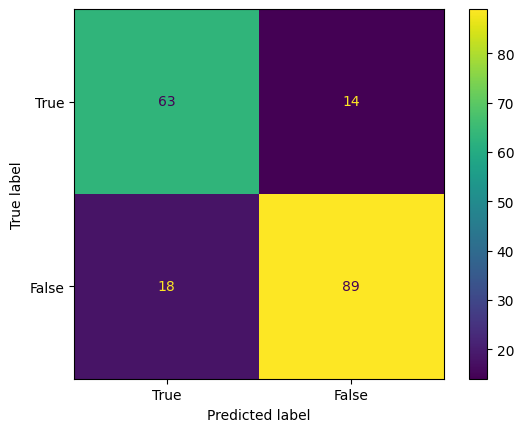

In [ ]:
display=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,rf_pred),display_labels=[True,False])
display.plot()
plt.show

In [ ]:
grid={'n_estimators':[100,200,500],
      'max_depth':[None,5,10],
      'min_samples_split':[2,4,6],
      'min_samples_leaf':[1,2,4]}

In [ ]:
grid

{'n_estimators': [100, 200, 500],
 'max_depth': [None, 5, 10],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [ ]:
from sklearn.model_selection import GridSearchCV
gs_rfc = GridSearchCV(estimator=rfc,
                      param_grid=grid,
                      cv=5,
                      verbose=2)
gs_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [ ]:
gs_rfc.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [ ]:
gs_pred=gs_rfc.predict(x_test)

print("akurasi:",accuracy_score(y_test,gs_pred))
print(classification_report(y_test,gs_pred))

akurasi: 0.8586956521739131
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        77
           1       0.87      0.89      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



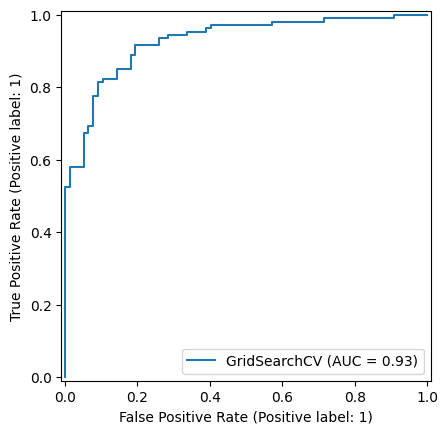

In [ ]:
RocCurveDisplay.from_estimator(gs_rfc, x_test, y_test)
plt.show()

In [ ]:
import pickle
pickle.dump(gs_rfc, open('gs_random_forest_tunning.pkl', 'wb'))

In [ ]:
load_pickle_model = pickle.load(open('gs_random_forest_tunning.pkl', 'rb'))

In [ ]:
load_pickle_model_pred=load_pickle_model.predict(x_test)

print("akurasi:",accuracy_score(y_test,load_pickle_model_pred))
print(classification_report(y_test,load_pickle_model_pred))

akurasi: 0.8586956521739131
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        77
           1       0.87      0.89      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184

